# МФТИ: МТИИ 2020 Python. 
## Семинар 7: Loguru. BS. Requests. Wandb.

## Логирование, библиотека Loguru:

Loguru is a library which aims to bring enjoyable logging in Python.

In [48]:
from loguru import logger

logger.debug("That's it, beautiful and simple logging!")

2020-10-22 10:52:56.308 | DEBUG    | __main__:<module>:3 - That's it, beautiful and simple logging!


In [49]:
logger.add("out.log", backtrace=True, diagnose=True)  # Caution, may leak sensitive data in prod

def func(a, b):
    return a / b

def nested(c):
    try:
        func(5, c)
    except ZeroDivisionError:
        logger.exception("What?!")

nested(0)

2020-10-22 10:53:52.965 | ERROR    | __main__:nested:10 - What?!
Traceback (most recent call last):

  File "/usr/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
           │         │     └ {'__name__': '__main__', '__doc__': 'Entry point for launching an IPython kernel.\n\nThis is separate from the ipykernel pack...
           │         └ <code object <module> at 0x7f5c692735b0, file "/home/tv-home/.local/lib/python3.8/site-packages/ipykernel_launcher.py", line 1>
           └ <function _run_code at 0x7f5c692554c0>
  File "/usr/lib/python3.8/runpy.py", line 87, in _run_code
    exec(code, run_globals)
         │     └ {'__name__': '__main__', '__doc__': 'Entry point for launching an IPython kernel.\n\nThis is separate from the ipykernel pack...
         └ <code object <module> at 0x7f5c692735b0, file "/home/tv-home/.local/lib/python3.8/site-packages/ipykernel_launcher.py", line 1>
  File "/home/tv-home/.local/lib/python3.8/site

Рассмотрим подробнее в [документации](https://github.com/Delgan/loguru)

### Извлечение данных из ```xml``` и ```html``` файлов. Библиотека Beautiful Soup:

Начнем с искусственного примера:

In [50]:
html_doc = """<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""

Парсим html данные:

In [52]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_doc, 'html.parser')

Теперь напечатаем код странички с форматированием:

In [53]:
print(soup.prettify())

<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ;
and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>


Библиотека позволяет перемещаться по DOM дереву и получать нужные нам элементы:

### ```title```

In [54]:
print(soup.title)

<title>The Dormouse's story</title>


### ```title.name```

In [55]:
print(soup.title.name)

title


### ```title.string```

In [56]:
print(soup.title.string)

The Dormouse's story


### ```title.parent.name```

In [57]:
print(soup.title.parent.name)

head


### ```p```

In [58]:
print(soup.p)

<p class="title"><b>The Dormouse's story</b></p>


### ```p['class']```

In [59]:
print(soup.p['class'])

['title']


### ```a```

In [60]:
print(soup.a)

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>


### ```find_all```

In [62]:
for a in soup.find_all('a'):
    print(a)

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>


### ```find```

In [63]:
print(soup.find(id="link3"))

<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>


### Пример парсинга данных из сети:

In [64]:
import requests
from bs4 import BeautifulSoup
import re

[Requests](Requests) is an elegant and simple HTTP library for Python, built for human beings.

Requests позволяет очень легко отправлять HTTP/1.1 запросы, без необходимости  вручную добавлять query строки к своим URL-адресам или кодировать данные POST. 

In [65]:
requests.get("http://rbc.ru/")

<Response [200]>

Можем посмотреть всю сопутствующую запросу информацию:

In [66]:
%%time
resp=requests.get("https://lenta.ru/brief/2019/03/25/apple/")
print("cookies:", resp.cookies)
print("time to download:", resp.elapsed)
print("page encoding", resp.encoding)
print("Server response: ", resp.status_code)
print("Is everything ok? ", resp.ok)
print("Page's URL: ", resp.url)

cookies: <RequestsCookieJar[<Cookie is_mobile=0 for .lenta.ru/>, <Cookie lid=vAsAADM+kV9INSBTAQazCwB= for .lenta.ru/>, <Cookie lids=482135484F8D77CD for .lenta.ru/>]>
time to download: 0:00:00.347485
page encoding utf-8
Server response:  200
Is everything ok?  True
Page's URL:  https://lenta.ru/brief/2019/03/25/apple/
CPU times: user 19.6 ms, sys: 4.51 ms, total: 24.1 ms
Wall time: 394 ms


И сам текст:

In [67]:
resp.text[:1000]

'<!DOCTYPE html><html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#"><head><title>Новинки презентации Apple: Гаджеты: Наука и техника: Lenta.ru</title><meta content="Новинки презентации Apple: Гаджеты: Наука и техника: Lenta.ru" name="title" /><meta content="text/html; charset=utf-8" http-equiv="Content-Type" />\n<script type="text/javascript">window.NREUM||(NREUM={});NREUM.info={"beacon":"bam-cell.nr-data.net","errorBeacon":"bam-cell.nr-data.net","licenseKey":"66a8d51230","applicationID":"1241738","transactionName":"J19cQUoOWA0ERBoQXhRZUUYXElwOFg==","queueTime":0,"applicationTime":224,"agent":""}</script>\n<script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={xpid:"VQUGU1VRGwICUFBVBAk=",licenseKey:"66a8d51230",applicationID:"1241738"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.exports,function(e){var i=t[n][1][e];return r(i||e)},i,i.exports)}return e[n].exports}if("f

In [68]:
BeautifulSoup(resp.text, "html.parser").get_text()[:1000]

'Новинки презентации Apple: Гаджеты: Наука и техника: Lenta.ru\n\nГлавноеРоссияМирБывший СССРЭкономикаСиловые структурыНаука и техникаКультураСпортИнтернет и СМИЦенности ПутешествияИз жизниДомСтатьиГалереиВидеоСпецпроектыМоторХочешь видеть только хорошие новости? Жми!Лента добра активирована. Это зона смеха и позитиваЛента добра деактивирована. Добро пожаловать в реальный мир.Лента добраВсё о коронавирусеНаука и техника\xa0Новая, персональнаяПопробоватьВсеНаукаЖизньКосмосОружиеИсторияТехникаГаджетыИгрыСофт\xa0АрхивApple провела первую в 2019 году пресс-конференциюApple запустила подписку на журналы и игрыApple выпустила кредитную картуТакже анонсировали онлайн-кинотеатр с эксклюзивными шоуApple уже пыталась показывать собственные шоуНовые устройства Apple показала за неделю до презентации 22:20, 25 марта 2019Новинки презентации AppleПерейти в «Мою Ленту»6Фото: Tony Avelar / APПоследние новости10:41В России выявили 15,9\xa0тысячи новых случаев заражения коронавирусом11:06Некоторых росси

Разбиваем по параграфам и получаем нужный результат:

In [69]:
bs=BeautifulSoup(resp.text, "html.parser")
title=bs.h1.text
text=BeautifulSoup(" ".join([p.text for p in bs.find_all("p")]), "html.parser").get_text()
print(title, "\n-----\n", text)

Новинки презентации Apple 
-----
 25 марта Apple провела пресс-конференцию, на которой показала свои новые продукты. Вокруг презентации было много слухов, главные из которых — выпуск новой версии AirPods и планшетов iPad mini и Air. Однако все свои новые гаджеты она анонсировала за неделю до мероприятия. Причем сделала это без всякой подготовки и просто разослала журналистам пресс-релизы.

В результате в самом начале презентации Тим Кук обозначил, что вся пресс-конференция была посвящена новым сервисам компании. В приложении Apple News, до сих пор недоступном в России, появится подписка News+, которая дает пользователю за ежемесячную плату в 10 долларов доступ к статьям в более чем 300 различных журналах. Вместе с этим пользователям будут доступны статьи в интернет-изданиях с платной подпиской, таких как The Wall Street Journal. Своего рода это пересборка старого приложения Newsstand («Киоск»), в котором пользователь должен был вручную оформлять подписку на интересующие журналы и покуп

## Логирование/отслеживание экспериментов (Experiment tracking). Weights & Biases.


Чтобы результаты записывались в облако, нужно залогиниться. Предоставить свой api-key. Самый простой способ - использование консоли:
```bash 
$ wandb login
```

In [ ]:
import wandb
wandb.login()

Посмотрим на следующий псевдо-эксперимент:

In [71]:
import math
import random

# Start a new run, tracking hyperparameters in config
wandb.init(project="test-drive", config={
    "learning_rate": 0.01,
    "dropout": 0.2,
    "architecture": "CNN",
    "dataset": "CIFAR-100",
})
config = wandb.config

# Simulating a training or evaluation loop
for x in range(50):
    acc = math.log(1 + x + random.random()*config.learning_rate) + random.random() + config.dropout
    loss = 10 - math.log(1 + x + random.random() + config.learning_rate*x) + random.random() + config.dropout
    # Log metrics from your script to W&B
    wandb.log({"acc":acc, "loss":loss})

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


acc,4.98073
loss,6.40512
_step,49
_runtime,1
_timestamp,1603354921


acc,▁▂▂▄▄▅▄▅▅▆▅▆▆▆▆▆▆▆▆▇▆▆▇▆▇▆▇▇▇█▆▇█▇▇█▇███
loss,█▆▅▄▅▅▄▄▃▄▃▄▃▄▃▂▃▂▃▃▃▂▂▃▂▃▂▃▂▁▃▁▂▂▁▁▂▂▂▁
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
_runtime,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
_timestamp,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


По ссылке выше можно смотреть результаты. Данные по одному проекту собираются вместе и их можно сравнивать. Запустите ячейку с этим экспериментов еще один раз и посмотрите, что произойдет.

Разберем еще несколько примеров:

In [75]:
# Simple Keras Model

import tensorflow as tf
from tensorflow.keras.callbacks import Callback
from wandb.keras import WandbCallback

# Set an experiment name to group training and evaluation
experiment_name = wandb.util.generate_id()

# Start a run, tracking hyperparameters
wandb.init(
  project="intro-demo",
  group=experiment_name,
  config={
    "layer_1": 512,
    "activation_1": "relu",
    "dropout": 0.2,
    "layer_2": 10,
    "activation_2": "softmax",
    "optimizer": "sgd",
    "loss": "sparse_categorical_crossentropy",
    "metric": "accuracy",
    "epoch": 50,
    "batch_size": 32
  })
config = wandb.config

# Get the data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build a model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(config.layer_1, activation=config.activation_1),
    tf.keras.layers.Dropout(config.dropout),
    tf.keras.layers.Dense(config.layer_2, activation=config.activation_2)
])
model.compile(optimizer=config.optimizer,
              loss=config.loss,
              metrics=[config.metric]
              )

history = model.fit(x=x_train,
                    y=y_train,
                    epochs=config.epoch,
                    batch_size=config.batch_size,
                    validation_data=(x_test, y_test),
                    # Use the WandbCallback to automatically save all the metrics tracked in model.fit() to your dashboard
                    callbacks=[WandbCallback()])

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


epoch,5
loss,0.11098
accuracy,0.96788
val_loss,0.09577
val_accuracy,0.9712
_step,5
_runtime,39
_timestamp,1603355536
best_val_loss,0.09577
best_epoch,5


epoch,▁▂▄▅▇█
loss,█▄▂▂▁▁
accuracy,▁▅▇▇██
val_loss,█▅▃▂▁▁
val_accuracy,▁▄▆▇██
_step,▁▂▄▅▇█
_runtime,▁▂▄▅▇█
_timestamp,▁▂▄▅▇█


Epoch 1/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6482 - accuracy: 0.8338 - val_loss: 0.3431 - val_accuracy: 0.9082
Epoch 2/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3451 - accuracy: 0.9036 - val_loss: 0.2784 - val_accuracy: 0.9243
Epoch 3/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2900 - accuracy: 0.9185 - val_loss: 0.2449 - val_accuracy: 0.9332
Epoch 4/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2552 - accuracy: 0.9289 - val_loss: 0.2191 - val_accuracy: 0.9397
Epoch 5/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2304 - accuracy: 0.9354 - val_loss: 0.2005 - val_accuracy: 0.9437
Epoch 6/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2114 - accuracy: 0.9417 - val_loss: 0.1856 - val_accuracy: 0.9484
Epoch 7/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1957 - accuracy: 0.9459 - val_loss: 0.1731 - val_accuracy:

Можем дополнительно поработать с результатами локально и сохранить их в wandb:

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


epoch,49
loss,0.04829
accuracy,0.98683
val_loss,0.06702
val_accuracy,0.9801
_step,49
_runtime,122
_timestamp,1603355704
best_val_loss,0.06702
best_epoch,49


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
loss,█▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,▁▄▅▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇████████████████████
val_loss,█▆▆▅▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▃▃▄▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇███████████████████
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
_runtime,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
_timestamp,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███


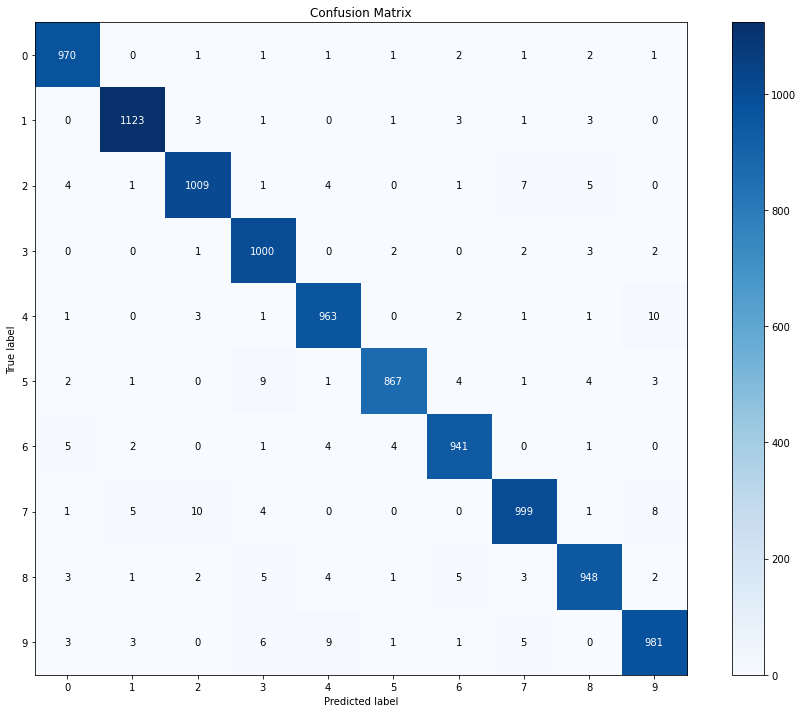

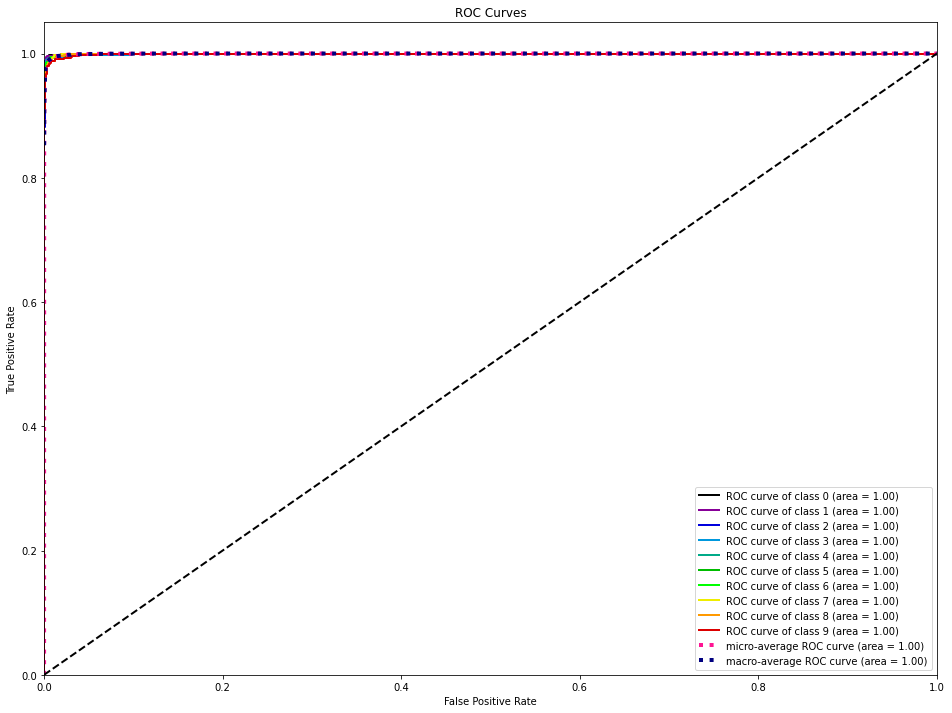

In [76]:
!pip install scikit-plot -qqq

import numpy as np
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from scikitplot.metrics import plot_confusion_matrix, plot_roc

wandb.init(project="intro-demo", group=experiment_name)

# Log F1 Score
y_test_pred = np.asarray(model.predict(x_test))
y_test_pred_class = np.argmax(y_test_pred, axis=1)
f1 = f1_score(y_test, y_test_pred_class, average='micro')
wandb.log({"f1": f1}, commit=False)

# Log Confusion Matrix
fig, ax = plt.subplots(figsize=(16, 12))
plot_confusion_matrix(y_test, y_test_pred_class, ax=ax)
wandb.log({"confusion_matrix": wandb.Image(fig)}, commit=False)

# Log ROC Curve
fig, ax = plt.subplots(figsize=(16, 12))
plot_roc(y_test, y_test_pred, ax=ax)
wandb.log({"plot_roc": wandb.Image(fig)}, commit=True)

class_score_data = []
for test, pred in zip(y_test, y_test_pred):
      class_score_data.append([test, pred])
wandb.log({"class_scores": wandb.Table(data=class_score_data,
                                           columns=["test", "pred"])})

### Лучшие практики:


Projects: Логируйте несколько запусков в один проект, чтобы затем сравнить их. ```wandb.init(project="project-name")```

Groups: Используйте группы, для группировки нескольки процессов одного эксперимента. ```wandb.init(group='experiment-1')```

Tags: Используйте тэги для индикации лучшей модели или текущего бейслайна.

Notes: Записывайте дополнительные комментарий к каждому запуску. 

Reports: Создавайте отчеты по группам экспериментов. 


### Дополнительные возможности:

1. Определение [переменных окружения](https://docs.wandb.com/library/environment-variables) (Environment variables). 

2. [Offline mode](https://docs.wandb.com/library/technical-faq#can-i-run-wandb-offline): Используйте `dryrun` режим, для тренировки офлайн, а синхронизацию можно будет сделать позже.

3. [Sweeps](https://docs.wandb.com/sweeps): Позволяют подбирать гиперпараметры просто и быстро.

5. [Artifacts](https://docs.wandb.com/artifacts): Позволяет контролить версии моделей и датасетов.

На этом возможности не ограничиваются. Примеры можно найти в галерее: https://wandb.ai/gallery. 

### Задание 1: Зарегистрируйтесь в wandb. Запустите один из экспериментов выше. Добавьте дополнительные переменные. Постройте графики к ним. Создайте отчет. 

### Задание 2*: Запустите Sweeps для подбора гиперпараметров.